# <center> Binary Prediction of Smoker Status using Bio-Signals </center>

<center> Autor: Morariu Tudor </center>

## Pas 1: Citirea si Prelucrarea Datelor

In [ ]:
import pandas as pd

data = pd.read_csv("train.csv");
data.drop(columns='id', inplace=True)

display(data.head());

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,55,165,60,81.0,0.5,0.6,1,1,135,87,94,172,300,40,75,16.5,1,1.0,22,25,27,0,1
1,70,165,65,89.0,0.6,0.7,2,2,146,83,147,194,55,57,126,16.2,1,1.1,27,23,37,1,0
2,20,170,75,81.0,0.4,0.5,1,1,118,75,79,178,197,45,93,17.4,1,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,91,180,203,38,102,15.9,1,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,91,155,87,44,93,15.4,1,0.8,19,13,17,0,1


*   Datele sunt numberice deci nu trebuie sa le transformam in numere.
*   Coloana *id* este inutila.

### Pas 1.1: Feature Engeneering

Dupa un dataset de pe net putem lua greutatea medie in functie de inaltime si sa dam diferenta fata de greutatea din dataset ca un feature. Acesta valoare ar da mai mult context modelului pentru overweight sau underweight.

In [ ]:
# Dataset luat de pe https://www.weightwatchers.com/au/blog/weight-loss/healthy-weight-range-chart
avg_weight = {
    148: 50,
    150: 51,
    152: 52,
    154: 53,
    156: 56,
    158: 58,
    160: 60,
    162: 62,
    164: 63,
    166: 64,
    168: 65,
    170: 66,
    172: 66,
    174: 68,
    176: 70,
    178: 71,
    180: 75,
    182: 77,
    184: 79,
    186: 80,
    188: 82,
    190: 85,
    192: 86,
    194: 88,
    196: 90,
    200: 95,
    202: 97,
    204: 100
}

def find_dif_weight(row):
    height = row["height(cm)"]
    res = avg_weight.get(height) or avg_weight[min(avg_weight.keys(), key = lambda key: abs(key - height))]
    
    row["dif"] = row["weight(kg)"] - res;
    
    return row;
    
data = data.apply(find_dif_weight, axis=1);

In [ ]:
display(data);

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,dif
0,55.0,165.0,60.0,81.0,0.5,0.6,1.0,1.0,135.0,87.0,94.0,172.0,300.0,40.0,75.0,16.5,1.0,1.0,22.0,25.0,27.0,0.0,1.0,-3.0
1,70.0,165.0,65.0,89.0,0.6,0.7,2.0,2.0,146.0,83.0,147.0,194.0,55.0,57.0,126.0,16.2,1.0,1.1,27.0,23.0,37.0,1.0,0.0,2.0
2,20.0,170.0,75.0,81.0,0.4,0.5,1.0,1.0,118.0,75.0,79.0,178.0,197.0,45.0,93.0,17.4,1.0,0.8,27.0,31.0,53.0,0.0,1.0,9.0
3,35.0,180.0,95.0,105.0,1.5,1.2,1.0,1.0,131.0,88.0,91.0,180.0,203.0,38.0,102.0,15.9,1.0,1.0,20.0,27.0,30.0,1.0,0.0,20.0
4,30.0,165.0,60.0,80.5,1.5,1.0,1.0,1.0,121.0,76.0,91.0,155.0,87.0,44.0,93.0,15.4,1.0,0.8,19.0,13.0,17.0,0.0,1.0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,40.0,155.0,45.0,69.0,1.5,2.0,1.0,1.0,127.0,80.0,64.0,238.0,47.0,72.0,159.0,14.5,1.0,0.8,25.0,26.0,13.0,0.0,0.0,-8.0
159252,50.0,155.0,75.0,82.0,1.0,1.0,1.0,1.0,120.0,80.0,89.0,213.0,202.0,64.0,108.0,14.5,1.0,0.6,21.0,20.0,18.0,0.0,0.0,22.0
159253,40.0,160.0,50.0,66.0,1.5,1.0,1.0,1.0,114.0,70.0,84.0,189.0,45.0,87.0,93.0,10.9,1.0,0.6,15.0,9.0,12.0,0.0,0.0,-10.0
159254,50.0,165.0,75.0,92.0,1.2,1.0,1.0,1.0,121.0,90.0,122.0,165.0,148.0,55.0,80.0,14.4,1.0,1.1,22.0,17.0,37.0,0.0,1.0,12.0


### Pas 1.2: Normalizare

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data_norm = pd.DataFrame(scaler.fit_transform(data), data.index, data.columns)

features = data_norm.drop(columns="smoking");
labels = data_norm["smoking"];

display(data_norm.head());

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,dif
0,0.538462,0.545455,0.30,0.394737,0.040816,0.051020,0.0,0.0,0.426471,0.483146,0.145897,0.300633,0.385224,0.244094,0.039806,0.720497,0.0,0.091837,0.020725,0.008239,0.025075,0.0,1.0,0.293478
1,0.769231,0.545455,0.35,0.500000,0.051020,0.061224,1.0,1.0,0.507353,0.438202,0.306991,0.370253,0.062005,0.377953,0.067240,0.701863,0.0,0.102041,0.027202,0.007552,0.035105,1.0,0.0,0.347826
2,0.000000,0.636364,0.45,0.394737,0.030612,0.040816,0.0,0.0,0.301471,0.348315,0.100304,0.319620,0.249340,0.283465,0.049489,0.776398,0.0,0.071429,0.027202,0.010299,0.051153,0.0,1.0,0.423913
3,0.230769,0.818182,0.65,0.710526,0.142857,0.112245,0.0,0.0,0.397059,0.494382,0.136778,0.325949,0.257256,0.228346,0.054330,0.683230,0.0,0.091837,0.018135,0.008926,0.028084,1.0,0.0,0.543478
4,0.153846,0.545455,0.30,0.388158,0.142857,0.091837,0.0,0.0,0.323529,0.359551,0.136778,0.246835,0.104222,0.275591,0.049489,0.652174,0.0,0.071429,0.016839,0.004119,0.015045,0.0,1.0,0.293478


## Pas 2: Plot-uri

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("dark_background")


#### Pas 2.1: Matricea de Corelatie

<AxesSubplot:title={'center':'Fig.1 Matrice Corelatie'}>

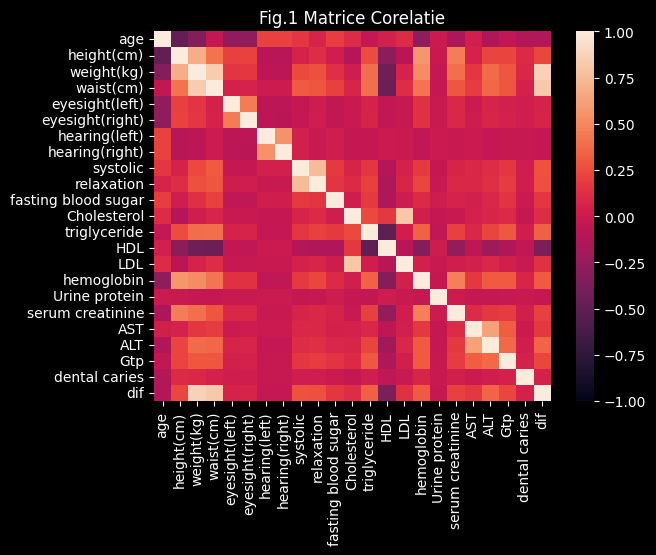

In [ ]:
mat_cor = features.corr();

plt.title("Fig.1 Matrice Corelatie")
sns.heatmap(mat_cor, vmax=1.0, vmin=-1.0)

*   Observam ca, in afara de diagonala principala, sunt cateva corelatii puternice cu coeficient mic, spre $-1$.

#### Pas 2.2: Plot PCA 2D

Voi face un plot 2D al dataset-ului folosind *PCA* pentru a vizualiza culsterizarea datelor si ce tip de model va trebui sa aplic.

<AxesSubplot:title={'center':'Fig.2 Plot PCA 2D'}>

<Figure size 640x1000 with 0 Axes>

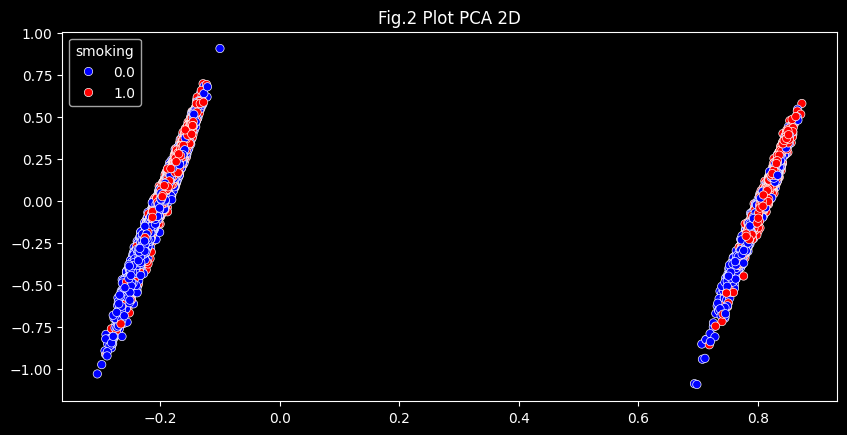

In [ ]:
from sklearn.decomposition import PCA

pca2d = PCA(n_components=2)

puncte_pca_2d = pca2d.fit_transform(features.head(10000))

plt.figure().set_figheight(10);
plt.figure().set_figwidth(10);

colors = ["#0000FF", "#FF0000"]

palette_custom = sns.color_palette(colors)

plt.title("Fig.2 Plot PCA 2D")

sns.scatterplot(
    x=puncte_pca_2d[:, 0],
    y=puncte_pca_2d[:, 1],
    hue=labels.head(10000),
    palette = palette_custom
)

*   Observ o separare intre cele doua clase, fumator si nefumator. Deci problema poate fi rezolvate cu o clasificare.
*   Dupa fiecare "bucata" de cod voi sterge variabilele de care un mai am nevoie pentru eliberarea memoriei.

In [ ]:
del pca2d
del puncte_pca_2d

#### Pas 2.3: Plot PCA 3D

Similar cu plot-ul anterior, dar acesta este in $3$ dimensiuni.

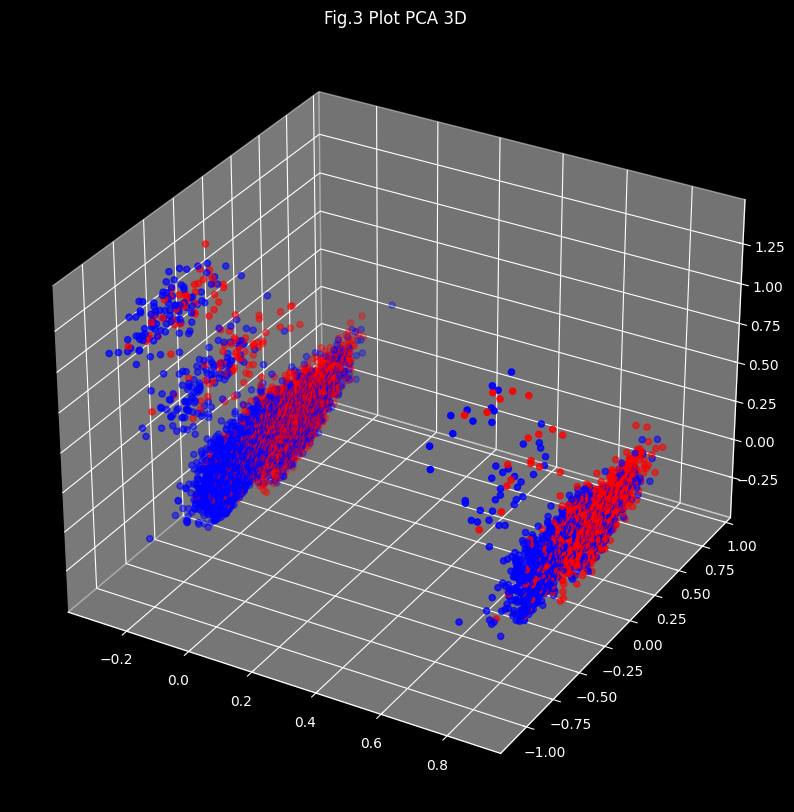

In [ ]:
from sklearn.decomposition import PCA

pca3d = PCA(n_components=3)

puncte_pca_3d = pca3d.fit_transform(features.head(10000))

f = plt.figure()

ax = f.add_subplot(111, projection='3d')

f.set_figheight(10);
f.set_figwidth(10);

color_map = {
    1.0: "red",
    0.0: "blue"
}
plt.title("Fig.3 Plot PCA 3D")

ax.scatter(
    puncte_pca_3d[:, 0],
    puncte_pca_3d[:, 1],
    puncte_pca_3d[:, 2],
    c=labels.head(10000).map(color_map)
)



*   Se obseva aceeasi separare intre clase si aici.
*   Nota: Graficele Fig.3 si Fig.2 sunt facute cu 10000 puncte.

In [ ]:
del pca3d
del puncte_pca_3d
del f
del ax
del color_map


## Pas 3: Impratirea Datelor de test si train

Pe datele de *train* vom antrena modelul si pe datele de *test* vom testa modelul pentru un scor unbiased.

In [ ]:
from sklearn.model_selection import train_test_split

train_f, test_f, train_l, test_l = train_test_split(features, labels, test_size=0.2, shuffle=True);

## Pas 4: Selectia si Antrenarea Modelelor

Fiind o problema de clasificare putem alege cateva modele. 

Eu voi alege:
1. MLPClassifier (Solutia imediata pentru o problema de clasificare)
2. Random Forest Classifier (Poate pot sa despart datele in functie de niste conditii) 
3. Neural Network (O solutie cu Deep Learning ^_^)

### Pas 4.1: MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(
    max_iter=1000,             # Numarul de epoci pe care sa le face NN-ul
    early_stopping=True,       # Flag pentru folosire a validation data
    validation_fraction=0.1,   # Ce procent din train data sa foloseasca pentru validation data
    verbose=0,                 # Flag pentru nivelul de debug logs
    tol=1e-8                   # Variabila cu erroarea dupa care se opreste modelul
)

model.fit(train_f, train_l)

MLPClassifier(early_stopping=True, max_iter=1000, tol=1e-08, verbose=0)

#### Pas 4.1.1: Scorare

In [ ]:
print("Scor: %.4f" % model.score(test_f, test_l))
del model

Scor: 0.7711


### Pas 4.2: Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    max_depth=1000 # Adancime maxima a Tree-ului
);
model.fit(train_f, train_l);

print("Scor: %.4f" % model.score(test_f, test_l));

Scor: 0.7730


In [ ]:
del model

### Pas 4.3: Neural Network

Voi implementa NN-ul folosing keras si tenorflow deoarece au suppport pentru GPU-uri.

#### Pas 4.3.1: Crearea Datelor de Validare

In [ ]:
train_f, val_f, train_l, val_l = train_test_split(train_f, train_l, test_size=0.1)

#### Pas 4.3.2: *One-Hot* Encoding

Modelul va prezice cat aparitine clasei $0$ si cat apartine clasei $1$, deci noi vrem ca un set de feature-uri sa apartina doar de o clasa.

In [ ]:
from keras.utils import to_categorical

train_l_hot = to_categorical(train_l);
val_l_hot = to_categorical(val_l);

#### Pas 4.3.3: Pregatirea Modelului

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input

import keras

model = Sequential()
model.add(Input(shape=(train_f.shape[1],)))     # Un layer de input cu numarul de feature-uri neuroni
model.add(Dense(9, activation='relu'))          # Un layer normal cu 9 neuroni (interconectati)
model.add(Dense(6, activation='relu'))          # Un layer normal cu 6 neuroni (interconectati)
model.add(Dense(3, activation='relu'))          # Un layer normal cu 3 neuroni (interconectati)
model.add(Dense(2, activation='softmax'))       # Layer de output cu 2 output-uri, pentru fircare clasa

model.summary()

model.compile(
    loss='categorical_crossentropy',                       # Functia de loss
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),   # Optimizerul, modul in care schimbam weight-urile fiecarui neuron
    metrics=['accuracy']                                   # Lista cu ce metrici vrem sa avem
)

2024-06-27 18:59:06.989442: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-06-27 18:59:06.989468: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-06-27 18:59:06.989474: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-06-27 18:59:06.989663: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-27 18:59:06.989686: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 9)              │           216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            21 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305 (1.19 KB)

 Trainable params: 305 (1.19 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf

with tf.device('/gpu:0'):                       # Selectam GPU-ul
    History = model.fit(
        train_f,                                # Dam modelului feature-urile de training
        train_l_hot,                            # Dam modelului label-urile in One-Hot encoding
        verbose=0,                              # Flag pentru nivelul de debug logs
        epochs=300,                             # Setam numarul de epoci pentru care se va antrena modelul
        validation_data=(val_f, val_l_hot),     # Dam modelului validation data
        batch_size=1024)                        # Dimensiunea fiecarui batch in care va imparti training data-ul

#### Pas 4.3.4: Plotarea Loss-ului si al Accuracy-ului

NameError: name 'History' is not defined

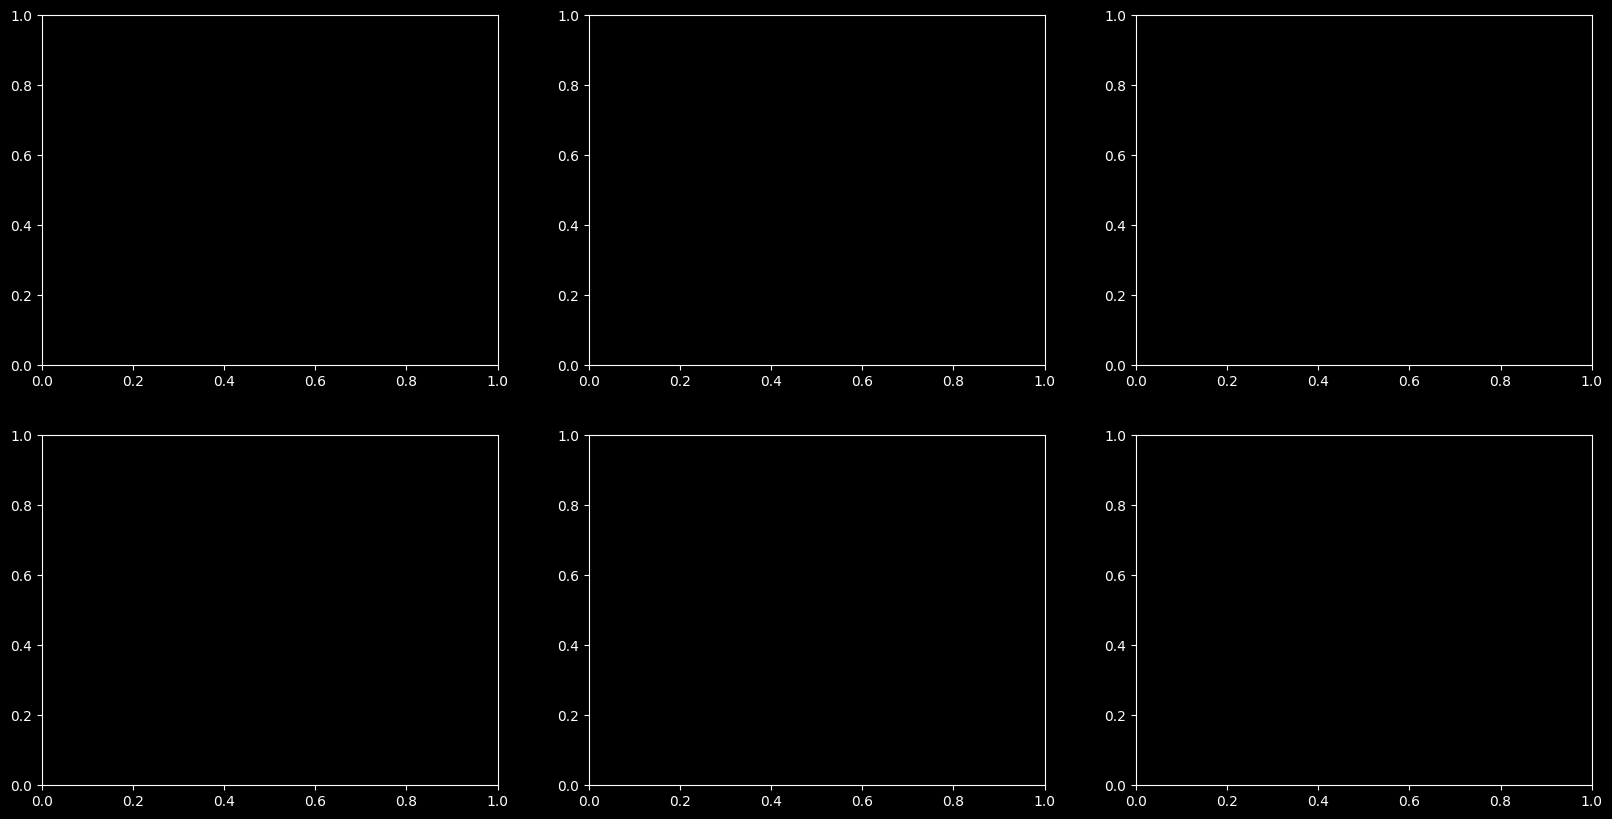

In [ ]:
f, ax = plt.subplots(2, 3);

f.set_figwidth(20);
f.set_figheight(10);

ax[0, 0].plot(History.history['accuracy'], 'c-')
ax[0, 0].set_xlabel("epoca");
ax[0, 0].set_ylabel("acuratete")
ax[0, 0].set_title("Fig.4.1 Acuratete train in funtie de epoca");

ax[0, 1].plot(History.history['val_accuracy'], 'y-')
ax[0, 1].set_xlabel("epoca");
ax[0, 1].set_ylabel("acuratete")
ax[0, 1].set_title("Fig.4.2 Acuratete val in funtie de epoca");

ax[0, 2].plot(History.history['accuracy'], 'c-')
ax[0, 2].plot(History.history['val_accuracy'], 'y-')
ax[0, 2].set_xlabel("epoca");
ax[0, 2].set_ylabel("acuratete")
ax[0, 2].set_title("Fig.4.3 Acuratete val si train in funtie de epoca");

ax[1, 0].plot(History.history['loss'], 'r-')
ax[1, 0].set_xlabel("epoca");
ax[1, 0].set_ylabel("loss")
ax[1, 0].set_title("Fig.4.4 Loss train in funtie de epoca");

ax[1, 1].plot(History.history['val_loss'], 'b-')
ax[1, 1].set_xlabel("epoca");
ax[1, 1].set_ylabel("loss")
ax[1, 1].set_title("Fig.4.5 Loss val in funtie de epoca");

ax[1, 2].plot(History.history['loss'], 'r-')
ax[1, 2].plot(History.history['val_loss'], 'b-')
ax[1, 2].set_xlabel("epoca");
ax[1, 2].set_ylabel("loss")
ax[1, 2].set_title("Fig.4.6 Loss train si val in funtie de epoca");


Observ ca modelul **nu** face overfiting (loss-ul pentru training data si vaidation data este in aceasi directe), deci modelul este facut corect.

In [ ]:
from sklearn.metrics import f1_score

pred = model.predict(test_f)
bool_pred = []

for a, b in pred:
    if(a > b):
        bool_pred.append(0)
    else:
        bool_pred.append(1);
    
print("Scor: %.4f" % f1_score(test_l, bool_pred))

996/996 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Scor: 0.6073


In [ ]:
del model
del train_l_hot
del val_l_hot

## Pas 5: Comparatiea modelelor incercate


<table>
  <tr>
    <th>Model</th>
    <th>Scor</th>
    <th>Note</th>
  </tr>
  <tr>
    <td>MLPClassifier</td>
    <td>0.7721</td>
    <td>Scor asteptat, datele sunt destul de clusterizate cu putine outline-ere</td>
  </tr>
  <tr>
    <td>Neural Network</td>
    <td>0.7193</td>
    <td>Similar cu MLPClassifier-ul, ii trebuie mai multe epoci deoarece pe graficele plotate vedem ca accuracy-ul nu stagneaza</td>
  </tr>
  <tr>
  <tr>
    <td>Random Forest Classifier (adancimea maxima 10000)</td>
    <td>0.7715</td>
    <td>Scorul depinde foarte mult de adnacime si de dimansiunea tree-ului. In cazul acesta, cum pe graficele 3D punctele se "mix" la mijloc, tree-ul este foarte mare si vulnerabil la overfit</td>
  </tr>
</table>

## Pas 6: Concluzii

Pentru o problema de clasificare binara, ca asta, sunt multe modele valabile. Dupa ce am analizat graficele am ajuns la concluzia ca un Neural Network ar functiona cel mai bine din cauza faptului ca nu este o granita clara intre clustere. Daca ne uitam in Fig.2 si Fig.3 vedem o amestecare a punctelor la mijloc.

Probabil un Support Vector Machine ar fi obtinut un scor mare dar punctele nu par sa fie definite de o functie. Chiar daca SVM-ul ar determina o functie de grad $500$, modelul va face overfit masiv. 

## Pas 7: Explicatia Solutiei

Pas 1: Citirea si Procesarea Datelor 

* Folosesc Pandas pentru prelucrarea datelor. In data-set am observat ca toate celulele contin valori numerice deci nu trebuie prelucrate extrem de mult, doar normalizate.

Pas 2: Plot-uri

* Pas 2.1: Matricea de Corelatie

 * In matricea de corelatie am observat ca unele valori variaza invers proportional.

* Pas 2.2: Plot PCA 2D (Fig.2)

 * In plot (Fig.2) se observa o separare intre punctele albastre si cele rosii. Deci problema este de clasificare.
 
* Pas 2.3: Plot PCA 3D (Fig.3)
 
 * In plot (Fig.3) observam aceeasi separare intre clustere, in mai multe dimensiuni ^_^.

Pas 3: Impartirea datelor

* Datele trebuie impartite in *train* si *test* pentru antrenarea modelului.

Pas 4: Selectia si antrenarea modelului

* Pas 4.1: MLPClassifier

 * Am ales acest model deoarece este simplu si rapid de implementat.
 
* Pas 4.2: Random Forest Classifier

 * Am ales acest model din cauza ca pe graficele plotate cu PCA (Fig.2 Fig.3) puntele par a fi despartite de niste granite pentru fiecare cluster. Spre exemplu pentru Fig.2 primul cluster are mai multe puncte rosii de la $y < 0.25$ dar sunt cateva pct. albastre pentru $y < 0.25$.
 
* Pas 4.3: Neural Network

 * Un neural network are un avantaj major fata de modelele clasice de ML. Pentru problema asta am facut un NN cu $22$ de inputuri trei layer-e cu $9, 6, 3$ neuroni si un output layer cu $2$ output-uri, unul pentru prima clasa si al doile pentru a doua clasa. Pentru optimizer am folosit *Adam* in loc de *SGD* pentru ca performaza mai bine pe dataset-ul acesta. Pe figurie Fig.4.x se observa ca modelul nu stagneaza in acuratete ceea ce inseamna ca, cu destul timp, putem sa obtinem o performanta mai buna.
 
## Pas 8: Imbunatatiri ulterioare

*   Marirea numarului de epoci pentru NN
*   Feature engeneering